# EDA

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sentiment Analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Document-Term Matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Preprocessing Tools
import spacy

In [3]:
# Import file
df = pd.read_csv('disneyland_reviews.csv', encoding='latin-1')
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [5]:
df.shape

(42656, 6)

In [6]:
# Rename columns for easier interpretability
df.rename(columns={'Year_Month':'Date', 'Review_ID': 'ID', 
                   'Review_Text': 'Reviews'}, inplace=True)
df.head()

,ID,Rating,Date,Reviewer_Location,Reviews,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [7]:
# Note that the Date column is a string object, not datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42656 entries, 0 to 42655
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 42656 non-null  int64 
 1   Rating             42656 non-null  int64 
 2   Date               42656 non-null  object
 3   Reviewer_Location  42656 non-null  object
 4   Reviews            42656 non-null  object
 5   Branch             42656 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.0+ MB


In [8]:
# Check the 'Date' column
dates = df.Date
dates.value_counts()

missing    2613
2015-8      786
2015-7      759
2015-12     701
2015-6      692
           ... 
2010-8        7
2010-5        4
2019-5        2
2010-3        2
2010-4        1
Name: Date, Length: 112, dtype: int64

**Although there are no null values, there are dates marked as "missing".  There are over 2000 missing date values.**

In [9]:
# Total reviews per branch
branches = df.groupby('Branch')['Reviews'].count().reset_index()
branches

,Branch,Reviews
0,Disneyland_California,19406
1,Disneyland_HongKong,9620
2,Disneyland_Paris,13630


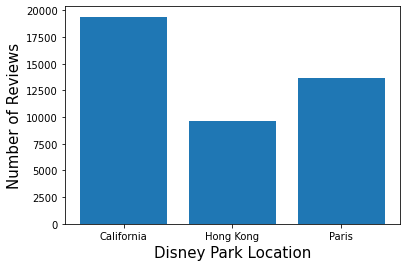

In [10]:
# Visualize the # of reviews per park with a bar plot
fig, ax = plt.subplots()

x = ['California', 'Hong Kong', 'Paris']
y = branches.Reviews

plt.xlabel('Disney Park Location', size=15)
plt.ylabel('Number of Reviews', size=15)
ax.bar(x=x, height=y)
plt.show()

In [11]:
# Ratings range from 1 to 5. 
# The mean rating is 4.2, which means that there are many more 4 and 5 reviews than 1, 2, 3.
# We can see that only 25% of the ratings are at or below 4
df.describe()

,ID,Rating
count,4.265600e+04,42656.000000
mean,3.188553e+08,4.217695
std,1.657092e+08,1.063371
min,1.398724e+06,1.000000
25%,1.743274e+08,4.000000
50%,2.907583e+08,5.000000
75%,4.489579e+08,5.000000
max,6.708014e+08,5.000000


In [10]:
# # Add 'Sentiment' column, set >3 stars to Positive, <3 to Negative, all others to Neutral
# df['Sentiment'] = ["Positive" if x >3 else "Negative" if x <3 else "Neutral" for x in df.Rating]

# df.head()

In [12]:
# Remove all 3-star reviews to avoid neutral statements
df = df[df.Rating!=3]

In [13]:
# Add 'Sentiment' column, set >=4 stars to Positive, <4 to Negative
df['Sentiment'] = ['Positive' if x >=4 else 'Negative' for x in df.Rating]

df.head()

,ID,Rating,Date,Reviewer_Location,Reviews,Branch,Sentiment
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,Positive
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,Positive
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,Positive
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,Positive
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,Positive


In [14]:
# ~90% of reviews are Positive and ~9% are Negative
df.Sentiment.value_counts(normalize=True)

Positive    0.903428
Negative    0.096572
Name: Sentiment, dtype: float64

In [15]:
# Distribution of ratings
df.Rating.value_counts()

5    23146
4    10775
2     2127
1     1499
Name: Rating, dtype: int64

In [15]:
# Average ratings for each park
total_calif = int(df.loc[df['Branch'].isin(['Disneyland_California']), 'Rating'].sum())/branches.Reviews[0]
total_hongk = int(df.loc[df['Branch'].isin(['Disneyland_HongKong']), 'Rating'].sum())/branches.Reviews[1]
total_paris = int(df.loc[df['Branch'].isin(['Disneyland_Paris']), 'Rating'].sum())/branches.Reviews[2]

print("The average rating for Disneyland - California is: ", total_calif)
print("The average rating for Disneyland - Hong Kong is: ", total_hongk)
print("The average rating for Disneyland - Paris is: ", total_paris)

The average rating for Disneyland - California is:  4.1485623003194885
The average rating for Disneyland - Hong Kong is:  3.7784823284823283
The average rating for Disneyland - Paris is:  3.5016140865737344


**Disneyland - California has the highest average rating**

### Save to Pickle, CSV File

In [ ]:
df.to_pickle('df_sentiment_pkl')

In [ ]:
df.to_csv('df_sentiment.csv', encoding='utf-8')

# Sentiment Analysis

In [31]:
# Assign the text reviews into a corpus of documents
corpus = df.Reviews
corpus

0        If you've ever been to Disneyland anywhere you...
1        Its been a while since d last time we visit HK...
2        Thanks God it wasn   t too hot or too humid wh...
3        HK Disneyland is a great compact park. Unfortu...
4        the location is not in the city, took around 1...
                               ...                        
42651    i went to disneyland paris in july 03 and thou...
42652    2 adults and 1 child of 11 visited Disneyland ...
42653    My eleven year old daughter and myself went to...
42654    This hotel, part of the Disneyland Paris compl...
42655    I went to the Disneyparis resort, in 1996, wit...
Name: Reviews, Length: 37547, dtype: object

## VADER
Compound score normalized between -1 (most extreme negative) and +1 (most extreme positive)

In [17]:
# Set the display constraints to be able to read entire reviews
pd.set_option('display.max_colwidth', None)

# Make a copy of the dataframe
df_vader = df.copy()

# Analyze with VADER
v_analyzer = SentimentIntensityAnalyzer()

# Apply sentiment scorer to the entire column of review data
df_vader['Score'] = df_vader.Reviews.map(v_analyzer.polarity_scores).map(lambda x: x.get('compound'))
df_vader.head(3)

,ID,Rating,Date,Reviewer_Location,Reviews,Branch,Sentiment,Score
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you'll find Disneyland Hong Kong very similar in the layout when you walk into main street! It has a very familiar feel. One of the rides its a Small World is absolutely fabulous and worth doing. The day we visited was fairly hot and relatively busy but the queues moved fairly well.,Disneyland_HongKong,Positive,0.7069
1,670682799,4,2019-5,Philippines,"Its been a while since d last time we visit HK Disneyland .. Yet, this time we only stay in Tomorrowland .. AKA Marvel land!Now they have Iron Man Experience n d Newly open Ant Man n d Wasp!!Ironman .. Great feature n so Exciting, especially d whole scenery of HK (HK central area to Kowloon)!Antman .. Changed by previous Buzz lightyear! More or less d same, but I'm expecting to have something most!!However, my boys like it!!Space Mountain .. Turns into Star Wars!! This 1 is Great!!!For cast members (staffs) .. Felt bit MINUS point from before!!! Just dun feel like its a Disney brand!! Seems more local like Ocean Park or even worst!!They got no SMILING face, but just wanna u to enter n attraction n leave!!Hello this is supposed to be Happiest Place on Earth brand!! But, just really Dont feel it!!Bakery in Main Street now have more attractive delicacies n Disney theme sweets .. These are Good Points!!Last, they also have Starbucks now inside the theme park!!",Disneyland_HongKong,Positive,0.9853
2,670623270,4,2019-4,United Arab Emirates,"Thanks God it wasn t too hot or too humid when I was visiting the park otherwise it would be a big issue (there is not a lot of shade).I have arrived around 10:30am and left at 6pm. Unfortunately I didn t last until evening parade, but 8.5 hours was too much for me.There is plenty to do and everyone will find something interesting for themselves to enjoy.It wasn t extremely busy and the longest time I had to queue for certain attractions was 45 minutes (which is really not that bad).Although I had an amazing time, I felt a bit underwhelmed with choice of rides and attractions. The park itself is quite small (I was really expecting something grand even the main castle which was closed by the way was quite small).The food options are good, few coffee shops (including Starbucks) and plenty of gift shops. There was no issue with toilets as they are everywhere.All together it was a great day out and I really enjoyed it.",Disneyland_HongKong,Positive,0.9920


In [ ]:
# # Set the display constraints to be able to read entire reviews
# pd.set_option('display.max_colwidth', None)

# # Review with highest sentiment score
# highest_sentiment = df_vader.iloc[df_vader.Score.idxmax()]
# highest_sentiment

In [ ]:
# # Review the lowest sentiment score
# lowest_sentiment = df_vader.iloc[df_vader.Score.idxmin()]
# lowest_sentiment

In [ ]:
# df_vader.Score.idxmin()

In [18]:
# The highest sentiment score
max_Score = df_vader['Score'].max()

# One of the reviews with the highest sentiment score
highest_sentiments = df_vader[df_vader['Score']==max_Score]
highest_sentiments.head(1)

ID  Rating    Date Reviewer_Location  \
12861  485486056       5  2017-5     United States   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [19]:
# Number of reviews with the same max sentiment score
len(highest_sentiments)

8

In [20]:
# Review with the lowest sentiment score
min_Score = df_vader['Score'].min()

lowest_sentiment = df_vader[df_vader['Score']==min_Score]
lowest_sentiment

ID  Rating     Date Reviewer_Location  \
2823  452236934       1  2016-12         Hong Kong   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [21]:
# Average sentiment of all the positive reviews
avg_pos_sentiment = df_vader.Score[df_vader.Sentiment == 'Positive'].mean()
avg_pos_sentiment

0.793291993160579

In [22]:
# Average sentiment of all the negative reviews
avg_neg_sentiment = df_vader.Score[df_vader.Sentiment == 'Negative'].mean()
avg_neg_sentiment

0.05847639271924986

**4- and 5-star reviews are quite positive with a score close to 0.8 while 1- and 2-star reviews are  positive, but barely.**

This may be because as sentences get longer, more neutral words exist, and therefore, the overall score tends to normalize towards neutral, or in this case make something negative more positive.  If the highest- and lowest-sentiment reviews are any indication of how wordy and lengthy each of the reviews are, especially for more impassioned reviews (very extreme either end), the wordiness of the negative reviews could cause the scores to be more positive than they really is. 

Also, note that capital letters and punctuation marks increase the sentiment score.

## Save to Pickle File

In [23]:
df_vader.to_pickle('df_sentiment_score_pkl')

In [ ]:
# Go to spaCy_preprocessing notebook

# Visual of Words in Reviews

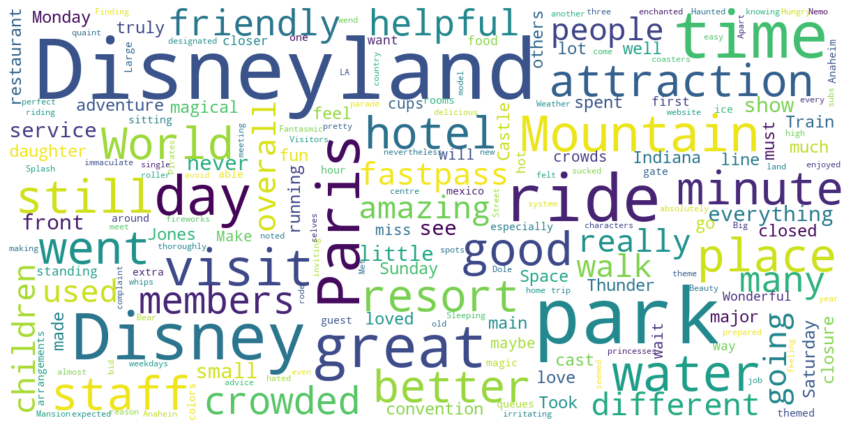

In [50]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=200, max_font_size=40, scale=3,
        random_state=1).generate(str(df['Reviews'].value_counts()))
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()